# Control Tutorial_10
_Reference : The Control Handbook, Control System Fundamentals, Edited by William S.Levine from p9-66 to p9-69_

# Compensation
---
A lead/lag compensator is a component in a control system that improves an undesirable frequency response in a feedback and control system.   
It is a fundamental building block in classical control theory. Both Lead and Lag Compensator can be added in series with the plant.

Series compentator is shown like:

<img src="figures/Compensator.png" hight="10">


## 1. Lead Compensator
A lead compensator gives the form of the transfer function like:

$$
G_c(s) = K\cdot \frac{\alpha Ts+1}{Ts+1}, \alpha>1
$$

Frequency responce of $G_c(j\omega)$:

<img src="figures/lead_compensator.png" hight="150">

The maximum phase-lead angle $\phi_m$ occurs at $\omega_m$, where

$$
\sin \phi_m = \frac{1-\alpha}{1+\alpha} \\
\omega_m = \frac{1}{\sqrt{a}T}
$$

A lead Compensator improves the phase margin and realise the quick response.

## 2. Lag Compensator
A lag compensator also gives the form of the transfer function like:

$$
G_c(s) = K\cdot \frac{\alpha Ts+1}{Ts+1}, \alpha<1
$$

Frequency responce of $G_c(j\omega)$:

<img src="figures/lag_compensator.png" hight="150">

$$
\sin \phi_m = \frac{1-\alpha}{1+\alpha} \\
\omega_m = \frac{1}{\sqrt{a}T}
$$

A lag compensator increases the magnitude and improve steady‐state performance at low frequency area of $\omega$.

## 3. Lead/Lag Compensator
A lead/lag compensator gives the form of the transfer function like:

$$
G_c(s) = K \cdot C_{lead} \cdot C_{lag} =  K\cdot \frac{\alpha_1 T_1s+1}{T_1s+1}\cdot \frac{\alpha_2 T_2s+1}{T_2s+1}, \alpha_1>1, \alpha_2<1
$$

A lead/lag compensator  improves the steady‐state performance and transient characteristic.

# Simulation

In [1]:
from scipy import signal
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def lti_to_sympy(lsys, symplify=True):
    """ Convert Scipy's LTI instance to Sympy expression """
    s = sy.Symbol('s')
    G = sy.Poly(lsys.num, s) / sy.Poly(lsys.den, s)
    return sy.simplify(G) if symplify else G

def sympy_to_lti(xpr, s=sy.Symbol('s')):
    """ Convert Sympy transfer function polynomial to Scipy LTI """
    num, den = sy.simplify(xpr).as_numer_denom()  # expressions
    p_num_den = sy.poly(num, s), sy.poly(den, s)  # polynomials
    c_num_den = [sy.expand(p).all_coeffs() for p in p_num_den]  # coefficients
    l_num, l_den = [sy.lambdify((), c)() for c in c_num_den]  # convert to floats
    return signal.lti(l_num, l_den)

In [3]:
def Plot_bode(sys1,sys2):
    horizon = np.linspace(0.1, 10, 1000)
    w1, mag1, phase1 = signal.bode(sys1, w=horizon)
    w2, mag2, phase2 = signal.bode(sys2, w=horizon)
    
    plt.subplots(2, 1, figsize=(7, 5))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.suptitle("Bode Plot")
    #The magnitude
    plt.subplot(2, 1, 1)
    plt.title("The magnitude")
    plt.semilogx(w1, mag1, label="without compensator")
    plt.semilogx(w2, mag2, label="with compensator")
    plt.ylabel("Gain[dB]")
    plt.grid()
    plt.legend()
    #The phase angle
    plt.subplot(2, 1, 2)
    plt.title("The phase angle")
    plt.semilogx(w1, phase1, label="without compensator")
    plt.semilogx(w2, phase2, label="with compensator")
    plt.xlabel("w[rad/sec]")
    plt.ylabel("Phase[deg]")
    plt.legend()
    plt.grid()
    plt.show()

In [4]:
def Plot_step(sys1,sys2):
    horizon = np.linspace(0, 20, 200)
    t1, y1 = signal.step(sys1, T=horizon)
    t2, y2 = signal.step(sys2, T=horizon)
    plt.plot(t1,y1,label="without compensator")
    plt.plot(t2,y2,label="with compensator")
    plt.ylabel("y(t)")
    plt.xlabel("Time (sec)")
    plt.grid(True)
    plt.legend()
    plt.show()

In [5]:
def Compensator(K,a,T):
    num = [K*a*T, K] 
    den = [T, 1]
    return signal.lti(num, den)

## Example (Lead compensator)
We consider the open loop transfer function:

$$
G_p(s) = \frac{10}{s(s+1)(s+10)}
$$

<img src="figures/Compensator.png" hight="10">

Then we put a lead compensator in series with the plant.  
In this example, the typical parameter of the lead compensator is floowing: $K=5, \alpha=3.9215, T = 0.1683$


In [6]:
G_p = signal.lti([], [0, -1, -10], 10).to_tf()
Lead = Compensator(5, 3.9215, 0.1683)
G_ps, Leads = lti_to_sympy(G_p), lti_to_sympy(Lead)

# closed loop transfer function without lead compensator
Closed = sy.simplify((G_ps)/(1+G_ps)).expand()
closed = sympy_to_lti(Closed)

# open and closed loop transfer function with lead compensator
Open_lead = sy.simplify(G_ps*Leads).expand()
Closed_lead = sy.simplify((G_ps*Leads)/(1+G_ps*Leads)).expand()
openlead, closedlead = sympy_to_lti(Open_lead), sympy_to_lti(Closed_lead)

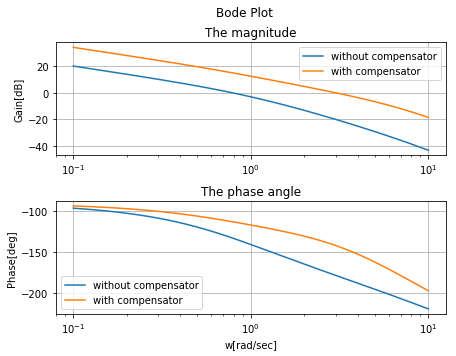

In [7]:
Plot_bode(G_p,openlead)

We can see the compensator improve the phase margin.

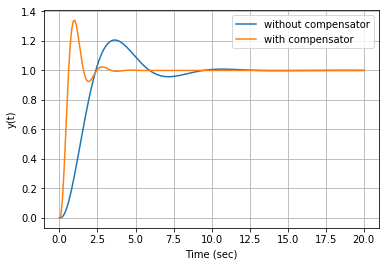

In [8]:
Plot_step(closed,closedlead)

We also can see the compensator improve the setting time.